<a href="https://colab.research.google.com/github/CMviking2003/comp215/blob/main/labs/lab03-classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 3
----------------
#### Name(s):
#### Date:

By the end of this lab you should be able to:
  * use a `class` to organize related data and functions
  * identify a `record` as a related collection of data, with fields for each data value

During this lab, you will be introduced to the following:
  * the `@dataclass` decorator to simplify class definition for classes that primarily encapsulate a data structure.
  * the `@classmethod` decorator to create 'object factories'.
  * plotting frequency distributions in `matplotlib`



## Near Earth Objects (with classes)

We'll continue working with Near Earth Object data using NASA's API: https://api.nasa.gov/.  In this lab we will define an Asteroid class to help us structure the data for easier data analysis.  Here's a brief review from Lab 2 on how to use the API.  

In [68]:
# import necessary modules
import datetime, json, requests
from dataclasses import dataclass
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

### Review: make an API query

Here's a query that gets the record for a single NEO that recently passed by.  Read these functions carefully to be sure you know what they are returning.  Note the nested for loop structure in the return statement of the `get_neos` function - be sure to understand what it is doing.  You might want to add some more `pprint` statements to be sure you understand the data structures.

In [178]:
API_KEY = 'Z6bnpeBjUGlGfBgMy68HVuEhJoMX0bjDf1qc9RgD'  # substitute your API key here

def get_neos(start_date):
    """ Return a list of NEO for the week starting at start_date """
    url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&api_key={API_KEY}'
    # Fetch last week's NEO feed
    response = requests.request("GET", url, headers={}, data={})
    data = json.loads(response.text)
    print(f'{data["element_count"]} Near Earth Objects found for week of {start_date}')
    return [neo for dated_records in data['near_earth_objects'].values() for neo in dated_records ]

def get_neo(id):
    """ Return a NEO record for the given id """
    url = f'https://api.nasa.gov/neo/rest/v1/neo/{id}?api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    return json.loads(response.text)

week_start = '2025-01-20'
neos = get_neos(week_start)
assert len(neos) > 0, f'Oh oh!  No NEOs found for {week_start}'
neo = get_neo(neos[-1]['id'])  # get the very latest NEO
pprint(neo)

97 Near Earth Objects found for week of 2025-01-20
{'absolute_magnitude_h': 26.077,
 'close_approach_data': [{'close_approach_date': '2025-01-20',
                          'close_approach_date_full': '2025-Jan-20 09:48',
                          'epoch_date_close_approach': 1737366480000,
                          'miss_distance': {'astronomical': '0.027451721',
                                            'kilometers': '4106718.98943427',
                                            'lunar': '10.678719469',
                                            'miles': '2551796.851642126'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '25905.531264047',
                                                'kilometers_per_second': '7.1959809067',
                                                'miles_per_hour': '16096.6896901519'}}],
 'designation': '2025 BJ',
 'estimated_diameter': {'feet': {'estimated_diameter_max': 118.7

## Exercise 1:  Define an Asteroid class

Define a simple Asteroid class with some basic state variables for a single NEO.  Your Asteroid class should define at least 4 "state variables:”

    id
    name
    estimated_diameter (m)
    is_potentially_hazardous (bool)

Operations must include:
* `__init__(self, ...)` method to initialize a new Asteroid object with specific data values
* `__str__(self)`, and `__repr__(self)` methods that return nicely formatted string representations of the object.

Write a little code to test your new class.

In [22]:
# Ex.1 your code here
class Asteroid:

  def __init__(self, id, name, diameter, hazardous):

    self.id = id
    self.name = name
    self.diameter = diameter
    self.hazardous = hazardous



  def getID(self):
    return self.id




  def getName(self):
    return self.name



  def getDiameter(self):
    return self.diameter



  def getPH(self):
    return self.hazardous



  def __str__(self):
    return "ID: " + str(self.id) + '\n' + "Name:" + self.name + '\n' + "Diameter: " + str(self.diameter) + '\n' + "Harzardous: " + str(self.hazardous) + '\n'



  def __repr__(self):

    return f"ID: {self.id} Name: {self.name} Diameter: {self.diameter} Hazardous: {self.hazardous}"





id = neo['id']
name = neo['name']
diameter = neo['estimated_diameter']['kilometers']
hazardous = neo['is_potentially_hazardous_asteroid']

#pprint(neo)
NEO = Asteroid(id, name, diameter, hazardous)

print(NEO)
print(NEO.getID())
print(NEO.getName())
print(NEO.getDiameter())
print(NEO.getPH())





ID: 54516130
Name:(2025 BC)
Diameter: {'estimated_diameter_min': 0.0113541591, 'estimated_diameter_max': 0.0253886716}
Harzardous: False

54516130
(2025 BC)
{'estimated_diameter_min': 0.0113541591, 'estimated_diameter_max': 0.0253886716}
False


## Exercise 2: Make a histogram

Create a list of all the Asteroid objects from this week's NEO feed and use the list to create a histogram to visualize the distribution of Asteroid diameters.  To create the historgram use the `hist()` method in the `matplotlib.pyplot` module.

Text(0, 0.5, 'Number of Asteroids with Diameter')

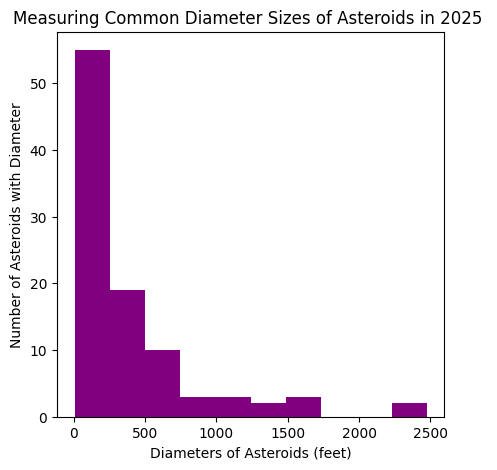

In [196]:
#CREATE DIAMETER LIST THAT CALCULATES AVERAGE
neo_avg_diam = [((neo['estimated_diameter']['feet']['estimated_diameter_min'] + neo['estimated_diameter']['feet']['estimated_diameter_max']) / 2) for neo in neos]

#GET YEAR OF DISTRIBUTION
week_string = week_start.split('-')
year = week_string[0]


#PLOTTING DATA ONTO A HISTOGRAM
plt.figure(figsize=(5, 5))
plt.hist(neo_avg_diam, color = 'purple')
plt.title(f'Measuring Common Diameter Sizes of Asteroids in {year} ')
plt.xlabel('Diameters of Asteroids (feet)')
plt.ylabel('Number of Asteroids with Diameter')





## Exercise 3: Use `@dataclass` and `@classmethod` to do the same thing

Now that you know how to define a simple class, we are going to use a use decorators to simplify (ie. shorten) our class definitions.  You will redefine the Asteroid class in this exercise.  Note that having two different definitions of a class in a single piece of code is very bad practice. I am asking you to do it here just so that you can see the differt ways to define classes.

 1. Use the `@dataclass` decorator from the `dataclasses` module to define the Asteroid class.  The `@dataclass` decorator will automatically generate some of the commonly used methods, like `__init()__`, `__repr()__`, and `__eq()__`.  The definition should start like this:
    ```
    @dataclass
    class Asteroid:
      ...
    ```
Write a little code to test your new class.
  

 2. Use the `@classmethod` decorator to construct a `from_NEO()` 'factory method' inside your Asteroid class that creates Asteroid objects from the NEO API.  The method should take the id for a single NEO, fetche the NEO record from API, constructs a single Asteroid object, and return the Asteroid object representing that NEO.  This kind of method is called a “Factory” because it constructs an object from raw materials.  The object factory method should start like this:
    ```
    @classmethod
    from_NEO(cls, neo_id):
        ...
    ```
Write a little code to test your new method.

 3. Use your new Asteroid class to create a list of Asteroid objects.  Use this list to create the same historgram as in Exercise 2.  




In [ ]:
@dataclass



## Challenge Exercise:

One of your esteemed astromoner collegues has a theory that there is a correlation between the diameter and the orbital period of an asteroid.  Add the `orbital_period` data from the NEO API to your Asteroid class definition and use it to plot the orbital period (in years) versus the estimated diameter (in m) of all the asteroids from this week's NEO record.  Do you see a correlation?

In [ ]:
# Ex. Challenge your code here